# Linear Discriminant

Like the Naive Bayes notebook, this was just playing around with what I can do with simple models.

Simple models do really well on the attack/no-attack problem, even without
adjusting for imbalanced classes. Total breakdown in the multi-label case. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
from sklearn.ensemble import BaggingClassifier
from mlxtend.plotting import plot_confusion_matrix

from data_read import data_read
from consistent_labels import get_attack_labels

In [2]:
%matplotlib inline
%load_ext watermark
%watermark -iv -p sklearn,mlxtend

pandas     0.24.0
numpy      1.15.4
matplotlib 3.0.2
sklearn 0.20.2
mlxtend 0.15.0.0


In [3]:
# load the data
labels = ['label', 'attack_cat']

df = data_read('train', 'fixed')
Y = df.loc[:,labels]
Y.label = Y.label.astype(int)
X = df.drop(columns=labels)

df = data_read('test', 'fixed')
Y_test = df.loc[:,labels]
Y_test.label = Y_test.label.astype(int)
X_test = df.drop(columns=labels)

In [4]:
lda = LinearDiscriminantAnalysis(n_components = 1)
lda.fit(X, Y.label)
Xt = lda.transform(X)

y_pred = lda.predict(X_test)

cm = confusion_matrix(Y_test.label, y_pred)
cm

array([[874249,  13255],
       [  1284, 127225]])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1b982748>)

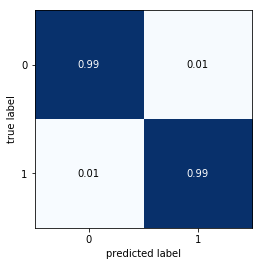

In [5]:
plot_confusion_matrix(cm, show_normed=True, show_absolute=False)

In [6]:
balanced_accuracy_score(Y_test.label, y_pred, adjusted=True)

0.9750733379419287

# Multi-label

We can't label attacks with something that doesn't learn
nonlinear relationships

In [7]:
Y_attackcat = Y.attack_cat.map(get_attack_labels())
Y_test_attackcat = Y_test.attack_cat.map(get_attack_labels())

In [8]:
lda = LinearDiscriminantAnalysis(n_components = 1)
lda.fit(X, Y_attackcat)
Xt = lda.transform(X)

y_pred = lda.predict(X_test)

cm = confusion_matrix(Y_test_attackcat, y_pred)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1da2e6a0>)

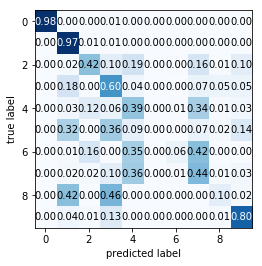

In [9]:
plot_confusion_matrix(cm, show_normed=True, show_absolute=False)

In [10]:
balanced_accuracy_score(Y_test_attackcat, y_pred, adjusted=True)

0.4191864284219262

# Bagging

Nope, random linear discriminants is not a thing. Especially with no imblannced learning fixes! One fun thing about the end of the bootcamp
is how much faster I am at trying random stuff just to see what happens.

In [11]:
clf = BaggingClassifier(LinearDiscriminantAnalysis(n_components=1),
                       n_estimators=100, max_features=.50, max_samples=.50,
                       n_jobs=-1, random_state=22)

clf.fit(X, Y_attackcat)

y_pred = clf.predict(X_test)

cm = confusion_matrix(Y_test_attackcat, y_pred)

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1dbb5550>)

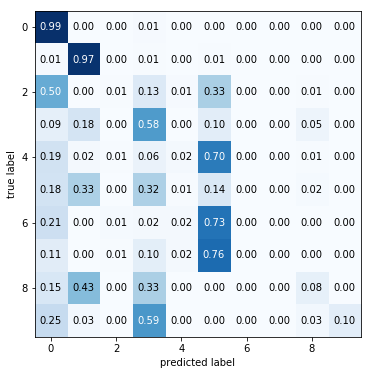

In [12]:
plot_confusion_matrix(cm, show_normed=True, show_absolute=False, figsize=(6,6))

In [13]:
balanced_accuracy_score(Y_test_attackcat, y_pred, adjusted=True)

0.21051464754934784